In [34]:
import kagglehub
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Description and Exploratory data analysis

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vclavvyrobk","key":"b22968f879ef4b522594bb7537095efd"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d amananandrai/ag-news-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
License(s): unknown
  0% 0.00/11.4M [00:00<?, ?B/s]
100% 11.4M/11.4M [00:00<00:00, 485MB/s]


In [5]:
with zipfile.ZipFile("ag-news-classification-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("ag_news")

In [19]:
train_df = pd.read_csv("ag_news/train.csv")
test_df = pd.read_csv("ag_news/test.csv")

In [20]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [21]:
len(train_df)

120000

In [22]:
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [23]:
len(test_df)

7600

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [28]:
train_df.columns = ['class_index', 'title', 'description']
test_df.columns = ['class_index', 'title', 'description']

In [29]:
train_df.head()

,class_index,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [30]:
categories = train_df['class_index'].unique()
categories

array([3, 4, 2, 1])

From kaggle dataset informations the classes are World, Sports, Business, Sci/Tech.

In [32]:
train_df['title'][0]

'Wall St. Bears Claw Back Into the Black (Reuters)'

In [33]:
categories_distribution = train_df['class_index'].value_counts()
categories_distribution

,count
class_index,
3,30000
4,30000
2,30000
1,30000


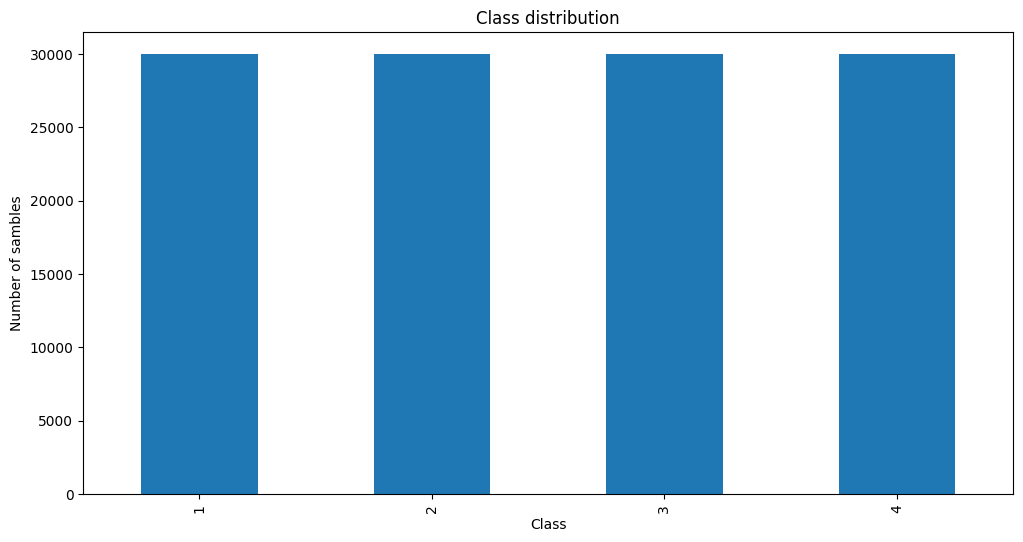

In [35]:
plt.figure(figsize=(12, 6))
train_df['class_index'].value_counts().sort_index().plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Number of sambles')
plt.show()

As we can see in the picture, the classes are equally distributed so I don't have to handle uneven classes. So for the metric I will use accuracy.